## Import Library

In [ ]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np

# Package Clustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import skfuzzy as fuzz

## Load Dataset

In [ ]:
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d mustafaoz158/flo-data -p /content

Dataset URL: https://www.kaggle.com/datasets/mustafaoz158/flo-data
License(s): unknown
  0% 0.00/656k [00:00<?, ?B/s]
100% 656k/656k [00:00<00:00, 1.44GB/s]


In [ ]:
# ekstrak zip-nya
with zipfile.ZipFile("/content/flo-data.zip", "r") as zip_ref:
    zip_ref.extractall("/content/flo_data")

# load csv ke pandas
df = pd.read_csv("/content/flo_data/flo_data_20k.csv")
df


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]"
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR]
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR]
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]"


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [ ]:
df[['order_num_total_ever_online', 'order_num_total_ever_offline',
    'customer_value_total_ever_online', 'customer_value_total_ever_offline']].describe()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_online,customer_value_total_ever_offline
count,19945.000000,19945.000000,19945.000000,19945.000000
mean,3.110855,1.913913,497.321690,253.922597
std,4.225647,2.062880,832.601886,301.532853
min,1.000000,1.000000,12.990000,10.000000
25%,1.000000,1.000000,149.980000,99.990000
50%,2.000000,1.000000,286.460000,179.980000
75%,4.000000,2.000000,578.440000,319.970000
max,200.000000,109.000000,45220.130000,18119.140000


order_num_total_ever_online: 1255 outliers
order_num_total_ever_offline: 2011 outliers
customer_value_total_ever_online: 1583 outliers
customer_value_total_ever_offline: 1191 outliers


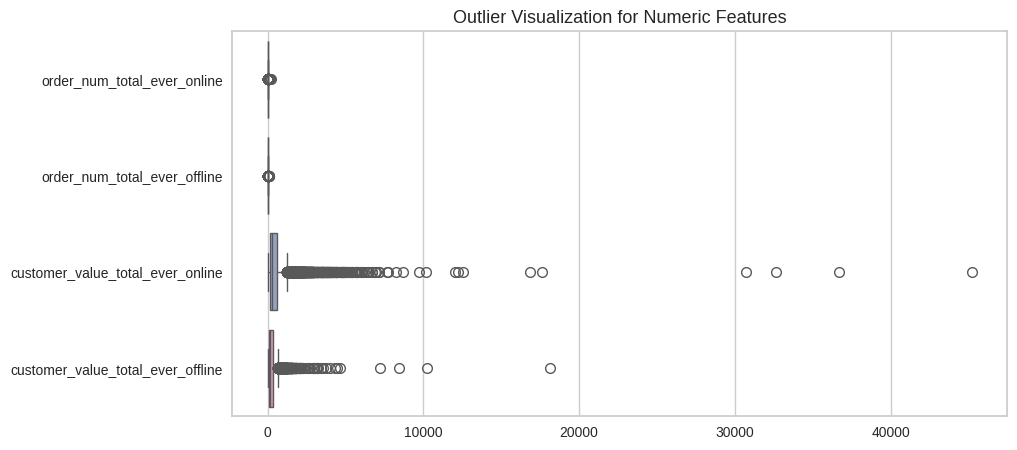

In [ ]:
# Outlier Detection
numeric_cols = ['order_num_total_ever_online', 'order_num_total_ever_offline',
                'customer_value_total_ever_online', 'customer_value_total_ever_offline']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

# Visualisasi boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols], orient="h", palette="Set2")
plt.title("Outlier Visualization for Numeric Features", fontsize=13)
plt.show()


Berdasarkan hasil boxplot, terlihat bahwa sebagian besar pelanggan memiliki jumlah transaksi dan nilai pembelian yang relatif rendah, dan hanya sebagian kecil pelanggan yang melakukan transaksi dalam jumlah besar. Titik-titik yang berada jauh di luar whisker pada boxplot mengindikasikan adanya outlier, yaitu pelanggan dengan frekuensi pembelian dan nilai transaksi yang jauh lebih tinggi dibandingkan pelanggan lainnya.

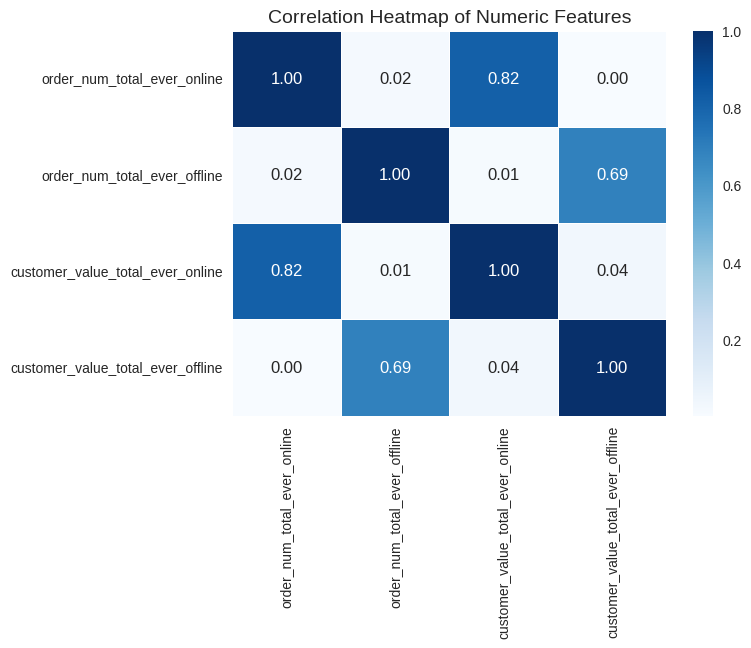

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(7,5))
corr = df[['order_num_total_ever_online', 'order_num_total_ever_offline',
           'customer_value_total_ever_online', 'customer_value_total_ever_offline']].corr()

sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


Berdasarkan heatmap korelasi, terdapat hubungan positif yang kuat antara jumlah pesanan dan nilai pembelian baik melalui online (r = 0.82) maupun offline (r = 0.69). Artinya, semakin banyak pelanggan bertransaksi, semakin besar pula nilai belanja mereka. Sementara itu, korelasi antar channel (online dan offline) sangat rendah, menunjukkan bahwa perilaku belanja pelanggan di kedua channel cenderung berbeda dan independen satu sama lain.

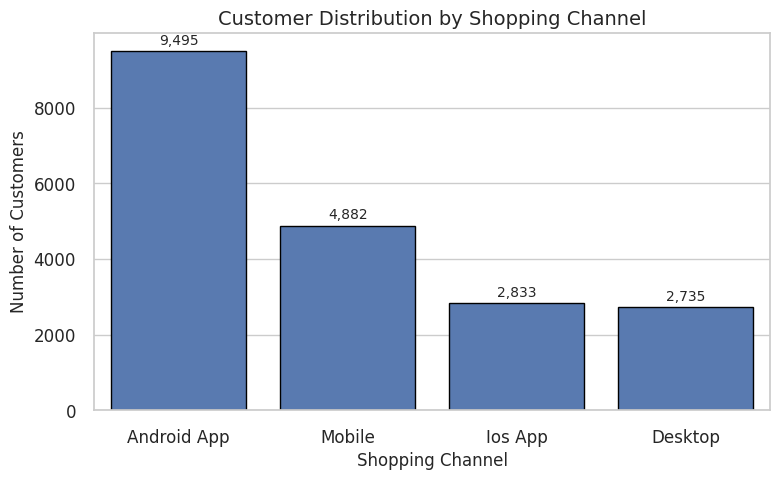

In [ ]:
# Distribution of Customers by Shopping Channel
sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(8,5))
channel_dist = df['order_channel'].value_counts().sort_values(ascending=False)

sns.barplot(x=channel_dist.index, y=channel_dist.values, color="#4B77BE", edgecolor="black")

plt.title("Customer Distribution by Shopping Channel", fontsize=14)
plt.xlabel("Shopping Channel", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

for i, value in enumerate(channel_dist.values):
    plt.text(i, value + (max(channel_dist.values)*0.01), f"{value:,}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

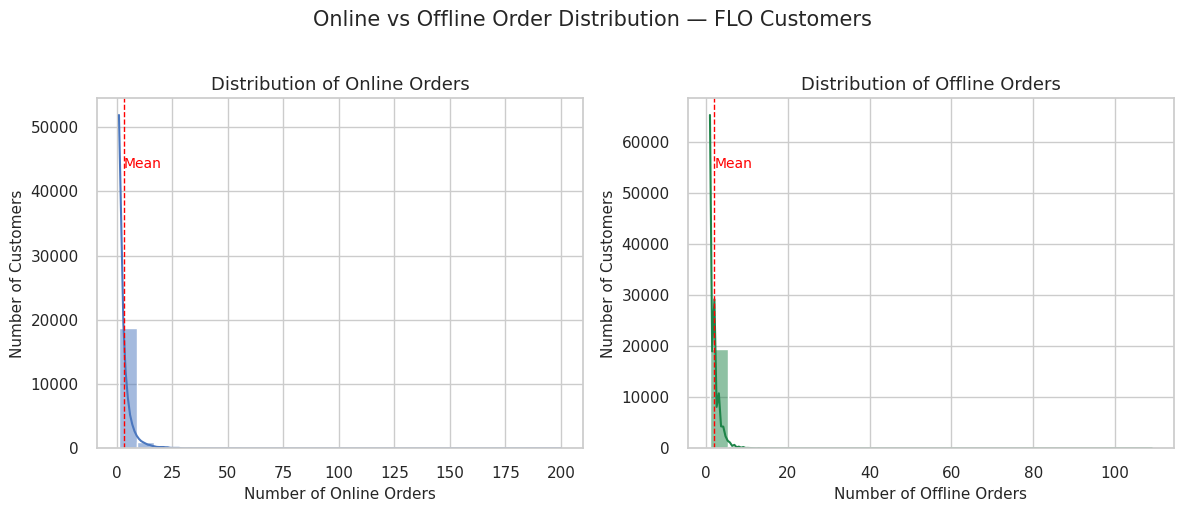

In [ ]:
# online vs offline order distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))

# online orders
plt.subplot(1,2,1)
sns.histplot(df['order_num_total_ever_online'],
             bins=25, kde=True, color="#4B77BE", edgecolor="white")
plt.title("Distribution of Online Orders", fontsize=13)
plt.xlabel("Number of Online Orders", fontsize=11)
plt.ylabel("Number of Customers", fontsize=11)
plt.axvline(df['order_num_total_ever_online'].mean(),
            color='red', linestyle='--', linewidth=1)
plt.text(df['order_num_total_ever_online'].mean()+0.2,
         plt.ylim()[1]*0.8, "Mean", color='red', fontsize=10)

# offline orders
plt.subplot(1,2,2)
sns.histplot(df['order_num_total_ever_offline'],
             bins=25, kde=True, color="#1E8449", edgecolor="white")
plt.title("Distribution of Offline Orders", fontsize=13)
plt.xlabel("Number of Offline Orders", fontsize=11)
plt.ylabel("Number of Customers", fontsize=11)
plt.axvline(df['order_num_total_ever_offline'].mean(),
            color='red', linestyle='--', linewidth=1)
plt.text(df['order_num_total_ever_offline'].mean()+0.2,
         plt.ylim()[1]*0.8, "Mean", color='red', fontsize=10)

# --- Layout keseluruhan ---
plt.suptitle("Online vs Offline Order Distribution — FLO Customers",
             fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

Distribusi menunjukkan bahwa sebagian besar pelanggan hanya melakukan sedikit transaksi, baik secara online maupun offline. Grafik menunjukkan distribusi yang sangat condong ke kanan (right-skewed), di mana mayoritas pelanggan memiliki jumlah pesanan di bawah 10, sedangkan hanya sedikit pelanggan yang memiliki jumlah pesanan sangat tinggi. Nilai rata-rata (mean) berada di sebelah kanan puncak distribusi, menunjukkan adanya beberapa pelanggan dengan aktivitas transaksi yang jauh lebih besar dari rata-rata. Hal ini mengindikasikan bahwa perilaku pembelian pelanggan FLO didominasi oleh pelanggan dengan frekuensi belanja rendah, sementara segelintir pelanggan sangat aktif dan berkontribusi besar terhadap total transaksi perusahaan.

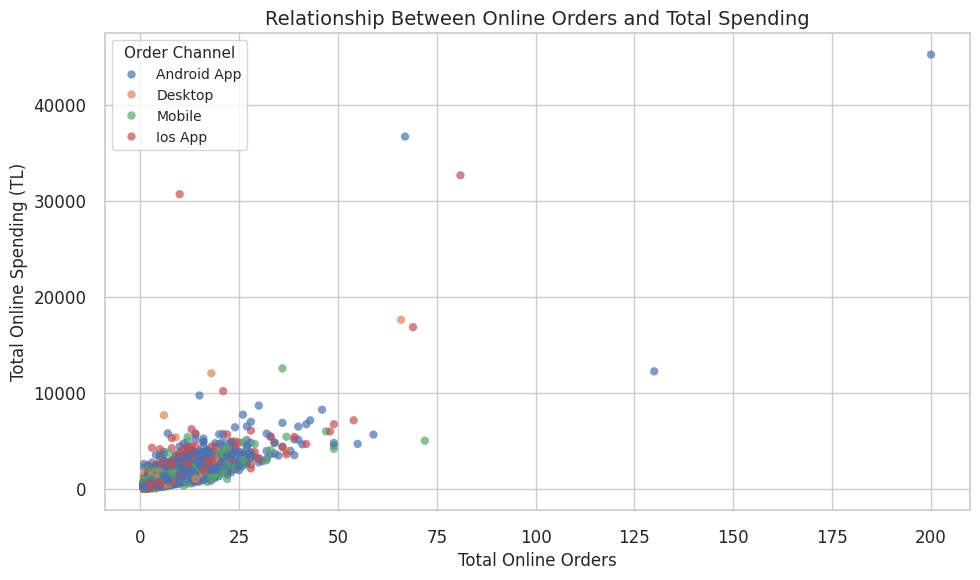

In [ ]:
# Relationship Between Total Orders and Spending (Online)
sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='order_num_total_ever_online',
    y='customer_value_total_ever_online',
    hue='order_channel',
    palette='deep',
    alpha=0.7,
    edgecolor='none'
)

plt.title("Relationship Between Online Orders and Total Spending", fontsize=14)
plt.xlabel("Total Online Orders", fontsize=12)
plt.ylabel("Total Online Spending (TL)", fontsize=12)
plt.legend(title="Order Channel", fontsize=10, title_fontsize=11, frameon=True)
plt.tight_layout()
plt.show()


Scatter plot tersebut menunjukkan hubungan antara jumlah pesanan online (Total Online Orders) dan total pengeluaran online (Total Online Spending) berdasarkan kanal pemesanan. Terlihat adanya hubungan positif. Semakin banyak pelanggan melakukan pesanan online, semakin besar pula total pengeluaran mereka. Namun, distribusi titik yang menyebar juga mengindikasikan adanya variasi besar antar pelanggan dengan jumlah pesanan yang sama. Dari sisi channel, transaksi melalui Android App tampak paling dominan, ditandai dengan banyaknya titik berwarna biru. Beberapa pelanggan dengan pengeluaran sangat tinggi juga berasal dari channel ini, menunjukkan potensi besar pengguna Android dalam mendukung penjualan online FLO. Secara keseluruhan, pola ini menegaskan bahwa aktivitas pemesanan memiliki pengaruh langsung terhadap total pengeluaran, dengan dominasi transaksi melalui platform mobile, khususnya aplikasi Android.

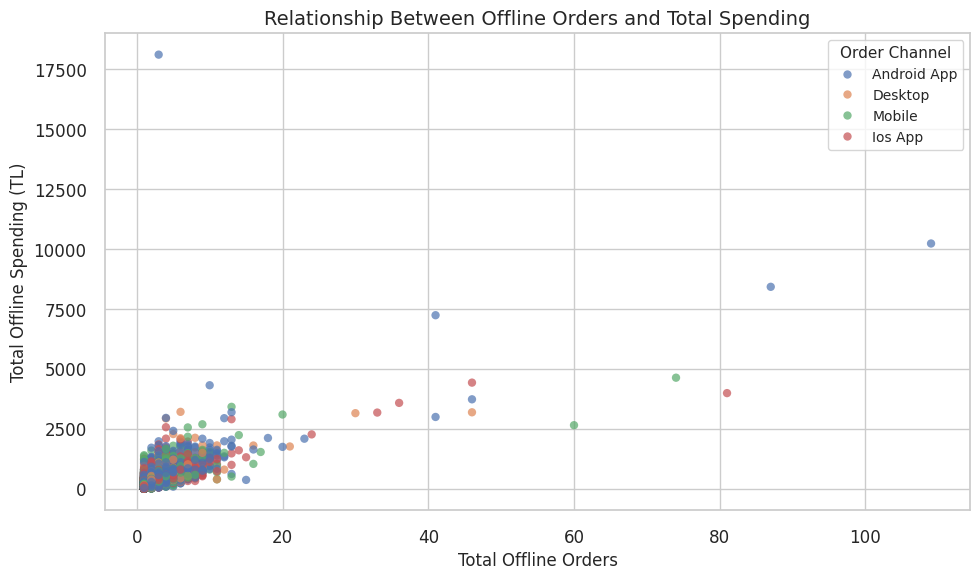

In [ ]:
# Relationship Between Total Orders and Spending (Offline)
sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='order_num_total_ever_offline',
    y='customer_value_total_ever_offline',
    hue='order_channel',
    palette='deep',
    alpha=0.7,
    edgecolor='none'
)

plt.title("Relationship Between Offline Orders and Total Spending", fontsize=14)
plt.xlabel("Total Offline Orders", fontsize=12)
plt.ylabel("Total Offline Spending (TL)", fontsize=12)
plt.legend(title="Order Channel", fontsize=10, title_fontsize=11, frameon=True)
plt.tight_layout()
plt.show()


Sama seperti pada transaksi melalui online, scatter plot pada pembelian secara offline menunjukkan hubungan positif dengan terdapat beberapa variasi titik yang menyebar. Sebagian besar pelanggan memiliki jumlah pesanan dan pengeluaran yang relatif rendah, dengan hanya sedikit pelanggan yang melakukan pembelian dalam jumlah besar. Channel Android App dan Mobile mendominasi pada transaksi dengan pengeluaran tinggi, menunjukkan bahwa pelanggan yang menggunakan platform tersebut cenderung lebih aktif juga dalam pembelian offline.

## **Pre Processing**

## **Cleaning**

In [ ]:
# Cek mising value
df.isnull().sum()

,0
master_id,0
order_channel,0
last_order_channel,0
first_order_date,0
last_order_date,0
last_order_date_online,0
last_order_date_offline,0
order_num_total_ever_online,0
order_num_total_ever_offline,0
customer_value_total_ever_offline,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Ubah kolom tanggal menjadi date

date_cols = [col for col in df.columns if "date" in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

Boxplot pada eksplorasi data menunjukkan **outlier** pada variabel customer_value_total_ever_online dan ustomer_value_total_ever_offline. Akan tetapi, outlier tersebut tidak akan dihapus karena:
1. Customer value tersebut masih masuk akal melihat jumlah ordernya juga tinggi sehingga bukan merupakan salah data.
2. Data outlier mewakili pelanggan yang sangat aktif atau premium yang penting untuk mengenali segmen VIP / top spender.
3. Jika outlier dihapus, hasil segmentasi bisa bias karena semua pelanggan terlihat “biasa-biasa aja”.

## **Ekstraksi RFM**

### 1. Recency

In [ ]:
# Menentukan tanggal terkahir pada data
lastdate_dataset = df['last_order_date'].max()

# Menentukan snapshot yang akan digunakan
snapshot_date = lastdate_dataset + pd.Timedelta(days=1)

print(f"Tanggal terakhir di dataset: {lastdate_dataset}")
print(f"Snapshot date yang akan digunakan: {snapshot_date}")

Tanggal terakhir di dataset: 2021-05-30 00:00:00
Snapshot date yang akan digunakan: 2021-05-31 00:00:00


In [ ]:
# Membuat variabel recency
df['Recency'] = (snapshot_date - df['last_order_date']).dt.days

In [ ]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Recency
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],94
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",104
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",185
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",134
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],85


### 2. Frequency

In [ ]:
# Menggunakan variabel yang sudah ada untuk menghitung frequency
df['Frequency'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']

print(df[['master_id', 'Frequency']].head())

                              master_id  Frequency
0  cc294636-19f0-11eb-8d74-000d3a38a36f        5.0
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f       21.0
2  69b69676-1a40-11ea-941b-000d3a38a36f        5.0
3  1854e56c-491f-11eb-806e-000d3a38a36f        2.0
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f        2.0


### 3. Monetary

In [ ]:
# Menggabungkan pengeluaran online dan offline dari customer
df['Monetary'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']

print(df[['master_id', 'Monetary']].head())

                              master_id  Monetary
0  cc294636-19f0-11eb-8d74-000d3a38a36f    939.37
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   2013.55
2  69b69676-1a40-11ea-941b-000d3a38a36f    585.32
3  1854e56c-491f-11eb-806e-000d3a38a36f    121.97
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f    209.98


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [ ]:
# Membuat dataset RFM yang akan digunakan untuk clustering
df_rfm = df[['master_id', 'Recency', 'Frequency', 'Monetary']].copy()

df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   master_id  19945 non-null  object 
 1   Recency    19945 non-null  int64  
 2   Frequency  19945 non-null  float64
 3   Monetary   19945 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 623.4+ KB


In [ ]:
# Membuat dataset untuk interpretasi hasil cluster
df_interpretasi = df[['master_id', 'Recency', 'Frequency', 'Monetary','order_channel','last_order_date_online','last_order_date_offline','interested_in_categories_12']]

df_interpretasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   master_id                    19945 non-null  object        
 1   Recency                      19945 non-null  int64         
 2   Frequency                    19945 non-null  float64       
 3   Monetary                     19945 non-null  float64       
 4   order_channel                19945 non-null  object        
 5   last_order_date_online       19945 non-null  datetime64[ns]
 6   last_order_date_offline      19945 non-null  datetime64[ns]
 7   interested_in_categories_12  19945 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 1.2+ MB


## **Scalling**

In [ ]:
df_rfm = df_rfm.drop(columns='master_id')
df_rfm.head()

,Recency,Frequency,Monetary
0,94,5.0,939.37
1,104,21.0,2013.55
2,185,5.0,585.32
3,134,2.0,121.97
4,85,2.0,209.98


In [ ]:
# Standardisasi Data
scaler = MinMaxScaler()

data_rfm_scaled = scaler.fit_transform(df_rfm)
df_rfm_scaled = pd.DataFrame(data_rfm_scaled, columns=df_rfm.columns)
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.254795,0.015,0.019503
1,0.282192,0.095,0.042926
2,0.504110,0.015,0.011782
3,0.364384,0.000,0.001679
4,0.230137,0.000,0.003598


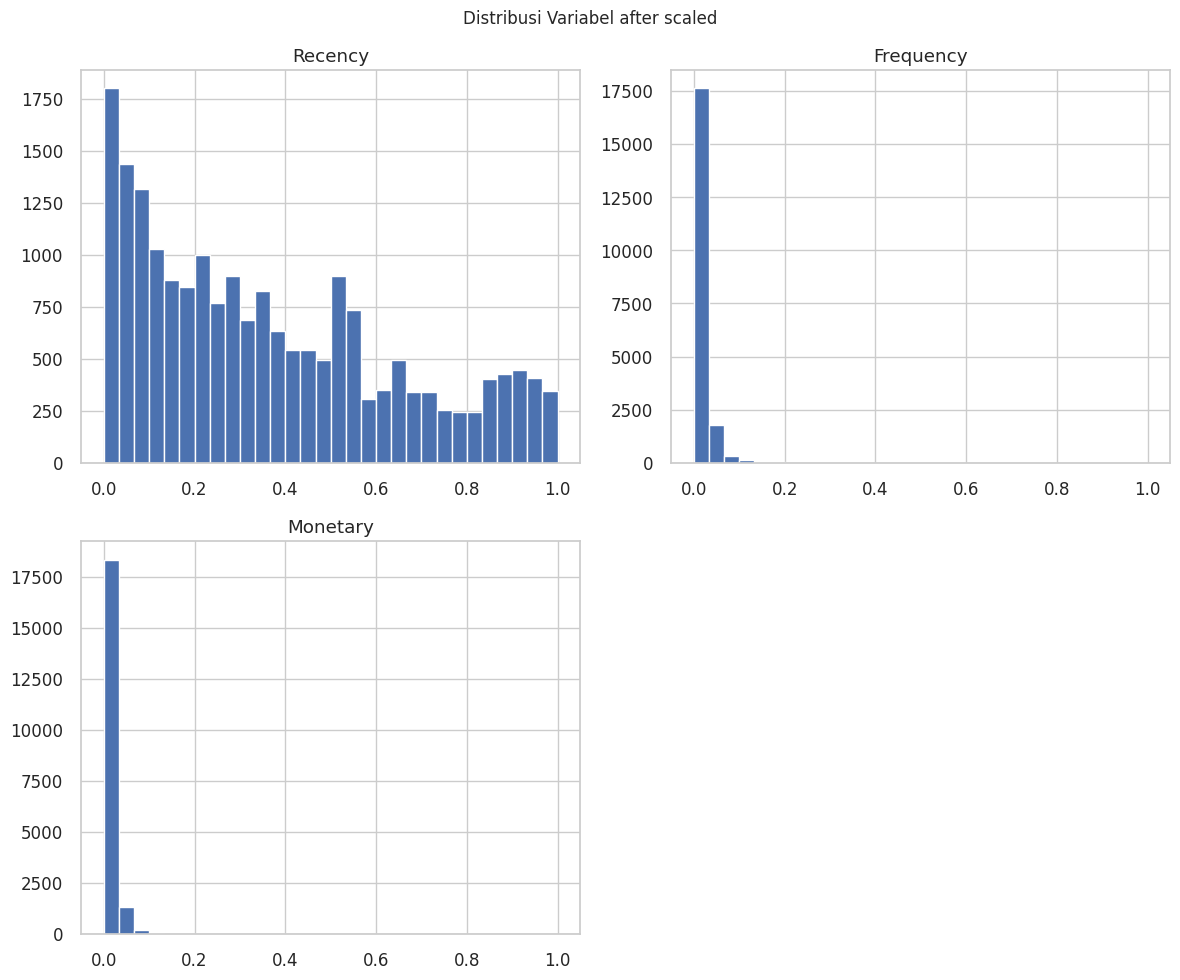

In [ ]:
df_rfm_scaled.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribusi Variabel after scaled", fontsize=12)
plt.tight_layout()
plt.show()

Berdasarkan histogram tersebut dapat diketahui bahwa scalling sudah berhasil dilakukan

## **Uji KMO & VIF**

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=b615fe0e5a2a028bba5f154aea36b04a45bbc49d1769455c98212d8f7f1ca7d6
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [ ]:
# KMO TEST (Kaiser-Meyer-Olkin)

from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd

# Pastikan hanya variabel numerik yang digunakan
df_numeric = df_rfm_scaled.select_dtypes(include=['float64', 'int64'])

# Hitung KMO
kmo_all, kmo_model = calculate_kmo(df_numeric)

print("KMO per variabel:")
print(pd.Series(kmo_all, index=df_numeric.columns))

print("\nKMO Overall:", kmo_model)

KMO per variabel:
Recency      0.881298
Frequency    0.506732
Monetary     0.506700
dtype: float64

KMO Overall: 0.5113949673529974


/usr/local/lib/python3.12/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
# VIF (Multicollinearity)

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Membuat DataFrame untuk VIF
vif_data = pd.DataFrame()
vif_data["Variabel"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i)
                   for i in range(df_numeric.shape[1])]

print(vif_data)


    Variabel       VIF
0    Recency  1.226402
1  Frequency  3.630805
2   Monetary  3.857998


# **Modeling K-Means Clustering**

## 1. K-Means Clustering without PCA

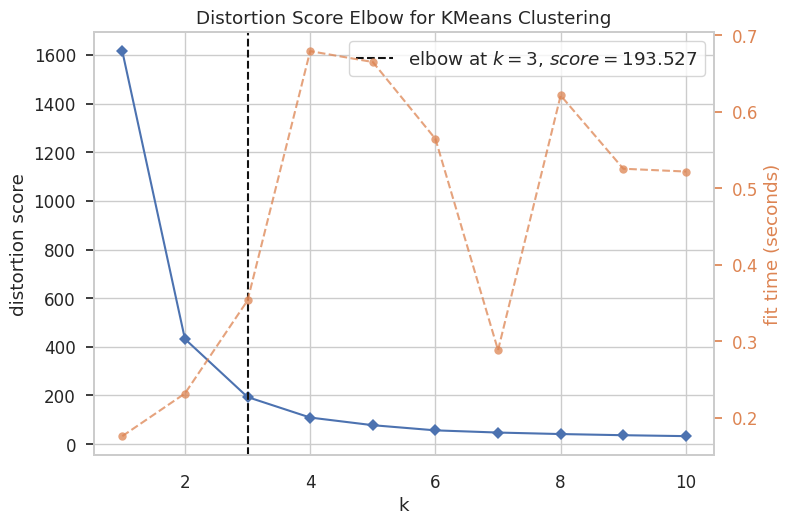

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmean_model = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmean_model, k=(1,11))
visualizer.fit(df_rfm_scaled)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering
df_kmeans = df_rfm_scaled.copy()

model_cluster_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
model_cluster_kmeans.fit(df_kmeans)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
evaluasi_model_kmeans = silhouette_score(df_kmeans, model_cluster_kmeans.labels_)
print(f"Silhouette Score: {evaluasi_model_kmeans}")

Silhouette Score: 0.5899728084539464


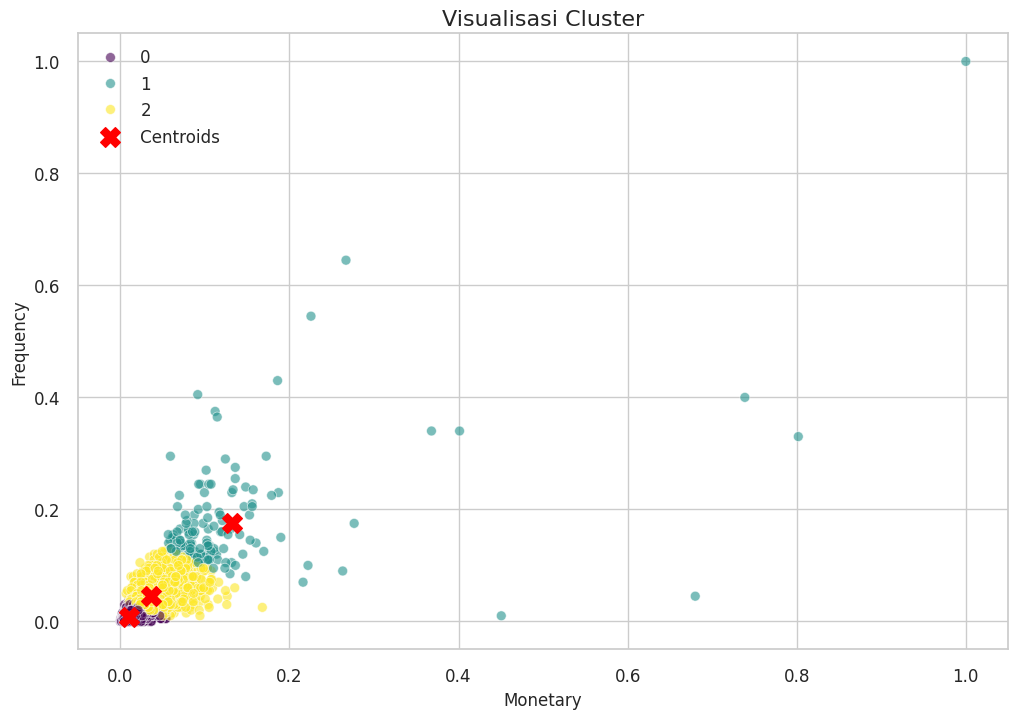

In [ ]:
# Membuat visualisasi hasil clustering
x_axis_col = 'Monetary'
y_axis_col = 'Frequency'

data_for_viz = df_kmeans[[x_axis_col, y_axis_col]]

# Modelling K-Means
kmeans_2d = KMeans(n_clusters=3, n_init='auto', random_state=42)
cluster_labels_2d = kmeans_2d.fit_predict(data_for_viz)

# Visualisasi
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=data_for_viz,
    x=x_axis_col,
    y=y_axis_col,
    hue=cluster_labels_2d,
    palette='viridis',
    s=50,
    alpha=0.6,
    edgecolor='w'
)

# Centroid
centroids_2d = kmeans_2d.cluster_centers_
plt.scatter(
    centroids_2d[:, 0],
    centroids_2d[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)

plt.title('Visualisasi Cluster', fontsize=16)
plt.xlabel(x_axis_col, fontsize=12)
plt.ylabel(y_axis_col, fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## K-Means Clustering with PCA

In [ ]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
transform_pca = pca.fit_transform(df_kmeans)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_pca_kmeans = pd.DataFrame(transform_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
model_kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
model_kmeans_pca.fit(df_pca_kmeans)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(transform_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

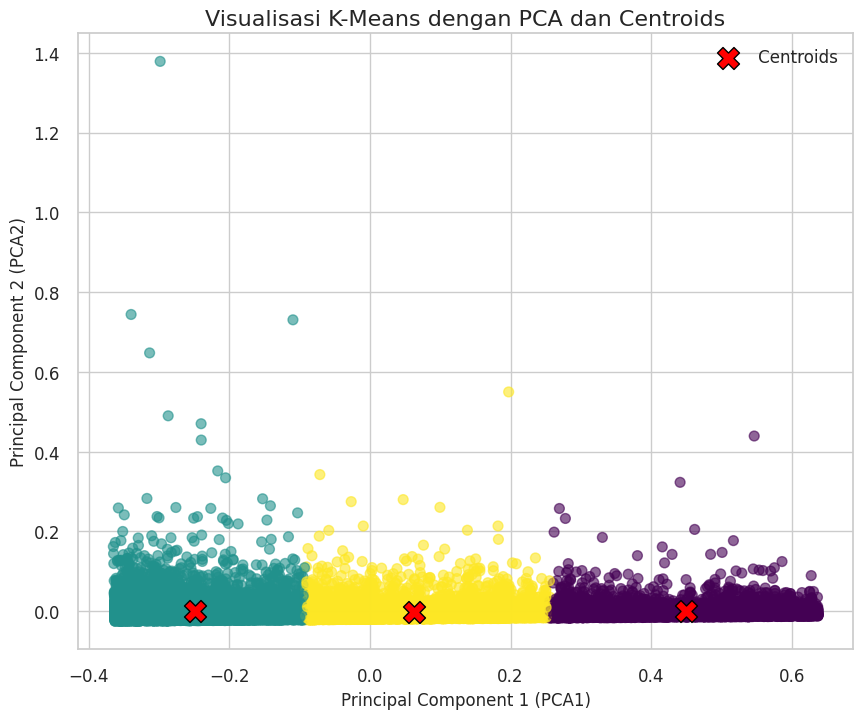

In [ ]:
centroids_cluster_pca_kmeans = model_kmeans_pca.cluster_centers_

plt.figure(figsize=(10, 8))

plt.scatter(df_pca_kmeans['PCA1'], df_pca_kmeans['PCA2'], c=model_kmeans_pca.labels_, cmap='viridis', s=50, alpha=0.6)
plt.scatter(
    centroids_cluster_pca_kmeans[:, 0],
    centroids_cluster_pca_kmeans[:, 1],
    c='red',
    s=250,
    marker='X',
    edgecolors='black',
    label='Centroids'
)
plt.title('Visualisasi K-Means dengan PCA dan Centroids', fontsize=16)
plt.xlabel('Principal Component 1 (PCA1)', fontsize=12)
plt.ylabel('Principal Component 2 (PCA2)', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
evaluasi_model_cluster_pca = silhouette_score(df_kmeans, model_kmeans_pca.labels_)
print(f"Silhouette Score: {evaluasi_model_cluster_pca}")

Silhouette Score: 0.5899728084539464


# **Modeling Fuzzy C-Means**

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
df_fuzzy = df_rfm_scaled.copy()

# skfuzzy.cmeans butuh bentuk (n_fitur, n_sampel)
X = df_fuzzy.values.T

print("Shape untuk FCM (fitur, sampel):", X.shape)


Shape untuk FCM (fitur, sampel): (3, 19945)


In [ ]:
cluster_final = 3  # dari hasil elbow / analisis sebelumnya

cntr_fcm, u_fcm, u0_fcm, d_fcm, jm_fcm, p_fcm, fpc_fcm = fuzz.cluster.cmeans(
    X,
    c=cluster_final,
    m=2.0,
    error=0.005,
    maxiter=1000,
    init=None,
    seed=42
)

print("Centroid FCM (RFM scaled):")
centroids_fcm = pd.DataFrame(cntr_fcm, columns=df_fuzzy.columns)
display(centroids_fcm)

Centroid FCM (RFM scaled):


,Recency,Frequency,Monetary
0,0.437116,0.013017,0.013851
1,0.106191,0.016982,0.017113
2,0.838812,0.011059,0.011850


In [ ]:
# evaluasi fcm (silhouette, davies-bouldin, FPC, PE)

def calc_fpc(u):
    n_samples = u.shape[1]
    return np.sum(u**2) / n_samples

def partition_entropy(u):
    eps = 1e-10
    return -np.sum(u * np.log(u + eps)) / u.shape[1]

# hard label dari membership fuzzy (0..2)
labels_fcm = np.argmax(u_fcm, axis=0)

# hitung metrik
sil_fcm = silhouette_score(df_fuzzy.values, labels_fcm)
db_fcm  = davies_bouldin_score(df_fuzzy.values, labels_fcm)
fpc_val = calc_fpc(u_fcm)
pe_val  = partition_entropy(u_fcm)

print("=== Evaluasi FCM (3 Cluster) ===")
print(f"Silhouette Score     : {sil_fcm:.4f}")
print(f"Davies-Bouldin Index : {db_fcm:.4f}")
print(f"Fuzzy Partition Coeff: {fpc_val:.4f}")
print(f"Partition Entropy    : {pe_val:.4f}")

=== Evaluasi FCM (3 Cluster) ===
Silhouette Score     : 0.5904
Davies-Bouldin Index : 0.5168
Fuzzy Partition Coeff: 0.8069
Partition Entropy    : 0.3554


In [ ]:
membership_df = pd.DataFrame(
    u_fcm.T,
    columns=[f"Cluster {i}" for i in range(cluster_final)]
)

# Kolom cluster dominan: 0..(n_cluster_final-1)
membership_df.insert(0, "Cluster", labels_fcm)

# Samakan index dengan index pada data asli
membership_df.index = df_fuzzy.index

membership_df

,Cluster,Cluster 0,Cluster 1,Cluster 2
0,1,0.384053,0.578484,0.037462
1,0,0.516522,0.432176,0.051302
2,0,0.935873,0.026570,0.037557
3,0,0.902243,0.075301,0.022456
4,1,0.260462,0.709242,0.030296
...,...,...,...,...
19940,2,0.017953,0.006120,0.975927
19941,0,0.996767,0.001937,0.001296
19942,1,0.043850,0.944672,0.011478
19943,0,0.585292,0.372650,0.042058


In [ ]:
df_rfm_fcm = pd.concat([df_rfm, membership_df], axis=1)
df_rfm_fcm.head()

,Recency,Frequency,Monetary,Cluster,Cluster 0,Cluster 1,Cluster 2
0,94,5.0,939.37,1,0.384053,0.578484,0.037462
1,104,21.0,2013.55,0,0.516522,0.432176,0.051302
2,185,5.0,585.32,0,0.935873,0.026570,0.037557
3,134,2.0,121.97,0,0.902243,0.075301,0.022456
4,85,2.0,209.98,1,0.260462,0.709242,0.030296


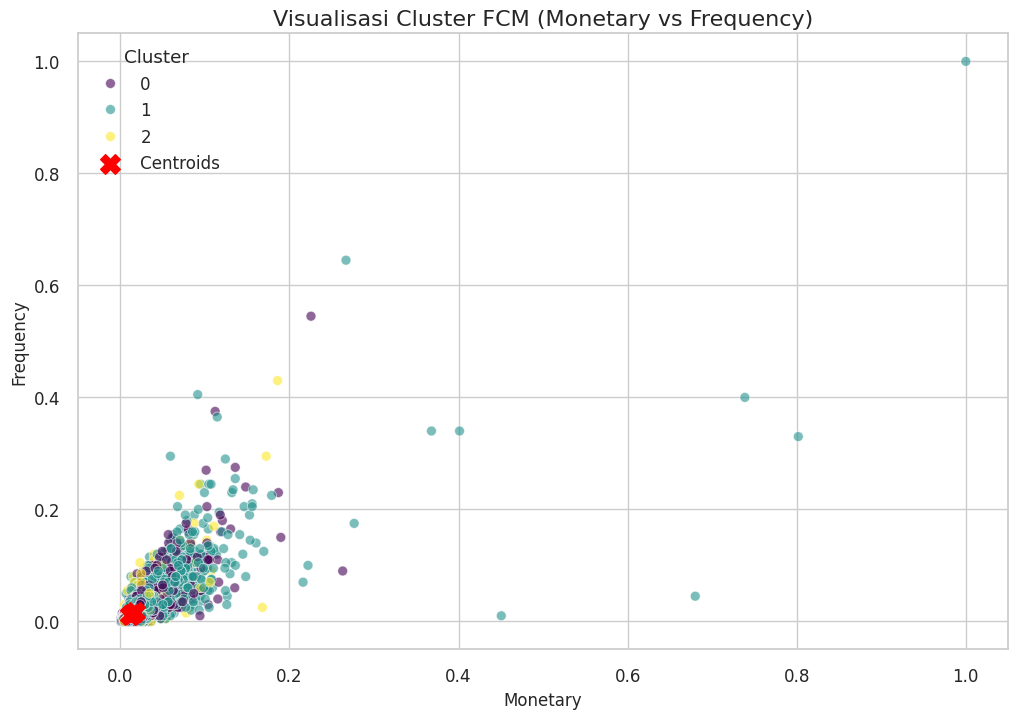

In [ ]:
# Membuat visualisasi hasil clustering FCM
x_axis_col = 'Monetary'
y_axis_col = 'Frequency'

data_for_viz = df_fuzzy[[x_axis_col, y_axis_col]]

# Hard cluster dari FCM
cluster_labels_fcm = labels_fcm   # (0,1,2)

# Centroid FCM (dalam skala RFM scaled)
centroids_2d_fcm = centroids_fcm[[x_axis_col, y_axis_col]].values

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=data_for_viz,
    x=x_axis_col,
    y=y_axis_col,
    hue=cluster_labels_fcm,
    palette='viridis',
    s=50,
    alpha=0.6,
    edgecolor='w'
)

# plot centroid FCM
plt.scatter(
    centroids_2d_fcm[:, 0],
    centroids_2d_fcm[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)

plt.title('Visualisasi Cluster FCM (Monetary vs Frequency)', fontsize=16)
plt.xlabel(x_axis_col, fontsize=12)
plt.ylabel(y_axis_col, fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

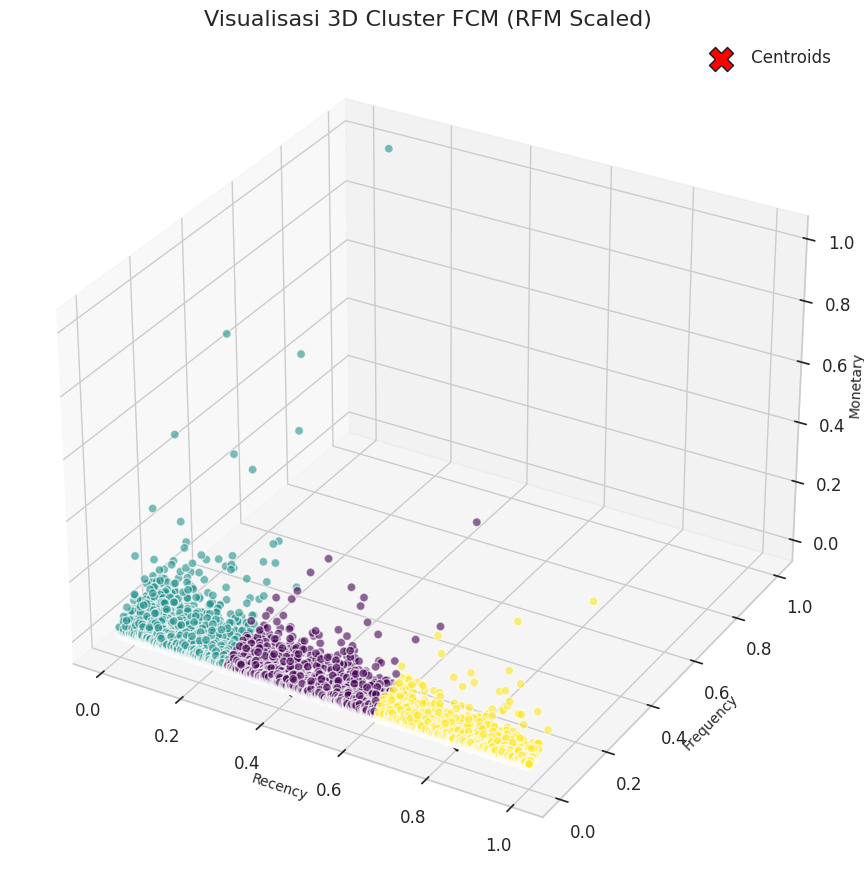

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X_3d = df_fuzzy[['Recency', 'Frequency', 'Monetary']]
labels_3d = labels_fcm  # hasil hard cluster FCM
centroids_3d = centroids_fcm[['Recency', 'Frequency', 'Monetary']].values

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_3d['Recency'],
    X_3d['Frequency'],
    X_3d['Monetary'],
    c=labels_3d,
    cmap='viridis',
    s=40,
    alpha=0.6,
    edgecolors='w'
)

# Centroid FCM
ax.scatter(
    centroids_3d[:, 0],
    centroids_3d[:, 1],
    centroids_3d[:, 2],
    c='red',
    s=300,
    marker='X',
    edgecolor='k',
    label='Centroids'
)

ax.set_title("Visualisasi 3D Cluster FCM (RFM Scaled)", fontsize=16)
ax.set_xlabel('Recency', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.set_zlabel('Monetary', fontsize=10)

ax.legend()
plt.tight_layout()
plt.show()

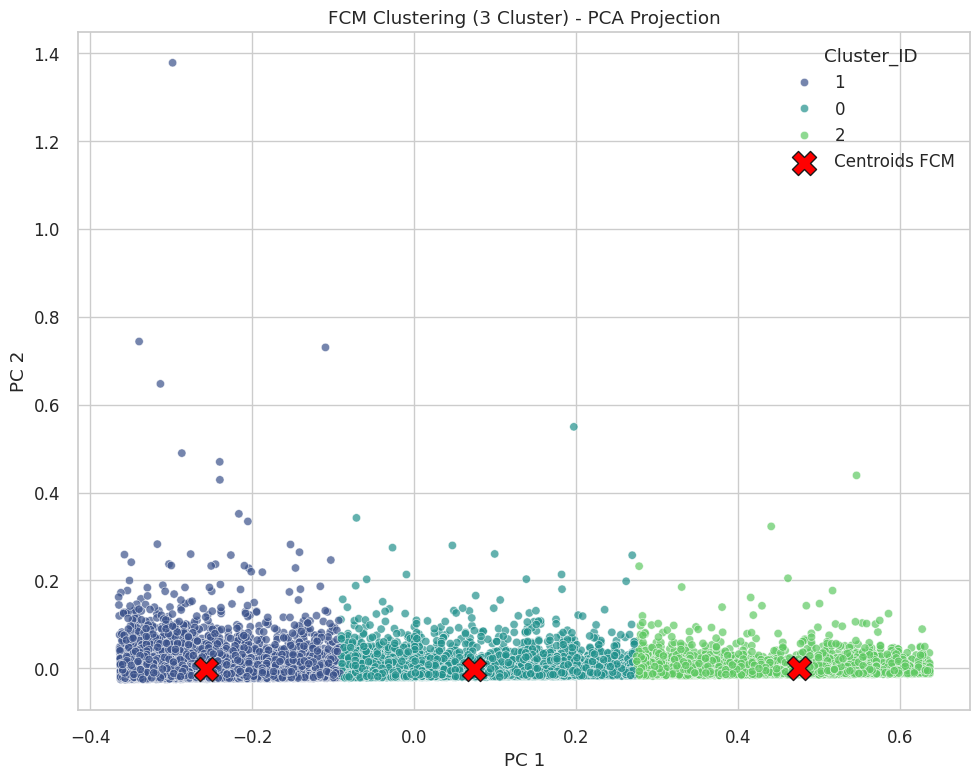

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_fuzzy.values)
centroids_pca = pca.transform(centroids_fcm.values)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=membership_df["Cluster"].astype(str),
    palette="viridis",
    alpha=0.7
)

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=300,
    edgecolor='k',
    label='Centroids FCM',
    c='red'
)

plt.title("FCM Clustering (3 Cluster) - PCA Projection")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster_ID")
plt.tight_layout()
plt.show()


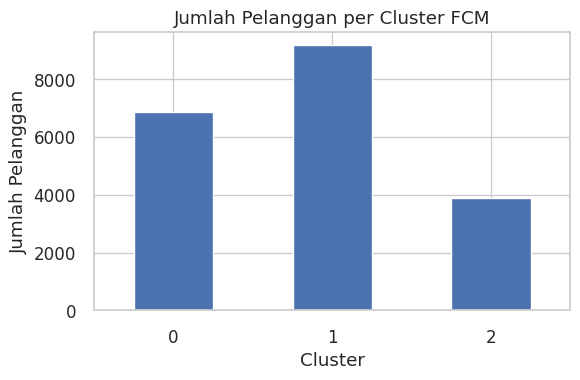

In [ ]:
plt.figure(figsize=(6, 4))

membership_df["Cluster"].value_counts().sort_index().plot(kind="bar")

plt.title("Jumlah Pelanggan per Cluster FCM")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Pelanggan")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# **Interpretasi**

## Interpretasi Berdasarkan Fuzzy C Means

In [ ]:
fcm_rfm_inversed = scaler.inverse_transform(df_rfm_scaled)
fcm_rfm_inversed  = pd.DataFrame(fcm_rfm_inversed, columns=['Recency','Frequency','Monetary'])
fcm_rfm_inversed['Cluster'] = df_rfm_fcm['Cluster'].values

fcm_rfm_inversed

,Recency,Frequency,Monetary,Cluster
0,94.0,5.0,939.37,1
1,104.0,21.0,2013.55,0
2,185.0,5.0,585.32,0
3,134.0,2.0,121.97,0
4,85.0,2.0,209.98,1
...,...,...,...,...
19940,330.0,3.0,401.96,2
19941,160.0,2.0,390.47,0
19942,7.0,3.0,632.94,1
19943,107.0,6.0,1009.77,0


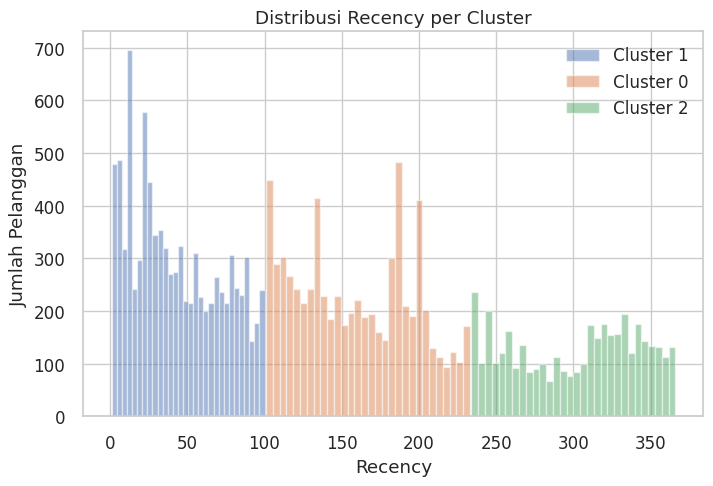

In [ ]:
fcm_rfm_inversed['Cluster'] = fcm_rfm_inversed['Cluster'].astype(str)

# Distribusi Recency per Cluster
plt.figure(figsize=(8,5))
for c in fcm_rfm_inversed['Cluster'].unique():
    plt.hist(fcm_rfm_inversed[fcm_rfm_inversed['Cluster'] == c]['Recency'],
             alpha=0.5,
             bins=30,
             label=f"Cluster {c}")
plt.title("Distribusi Recency per Cluster")
plt.xlabel("Recency")
plt.ylabel("Jumlah Pelanggan")
plt.legend()
plt.show()

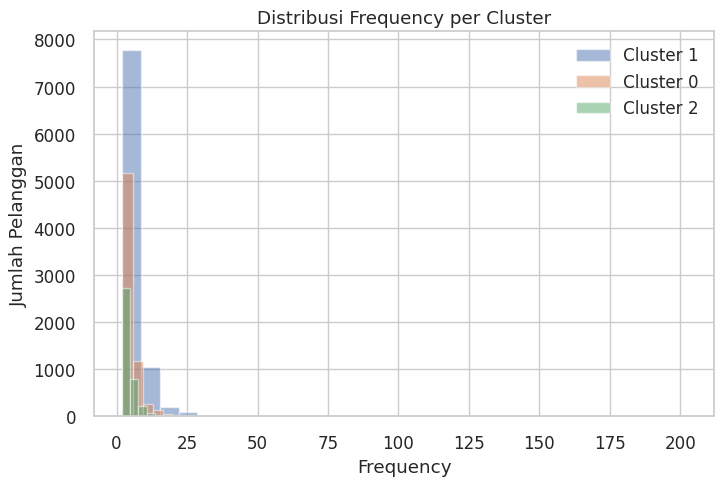

In [ ]:
# Distribusi Frequency per Cluster
plt.figure(figsize=(8,5))
for c in fcm_rfm_inversed['Cluster'].unique():
    plt.hist(fcm_rfm_inversed[fcm_rfm_inversed['Cluster'] == c]['Frequency'],
             alpha=0.5,
             bins=30,
             label=f"Cluster {c}")
plt.title("Distribusi Frequency per Cluster")
plt.xlabel("Frequency")
plt.ylabel("Jumlah Pelanggan")
plt.legend()
plt.show()

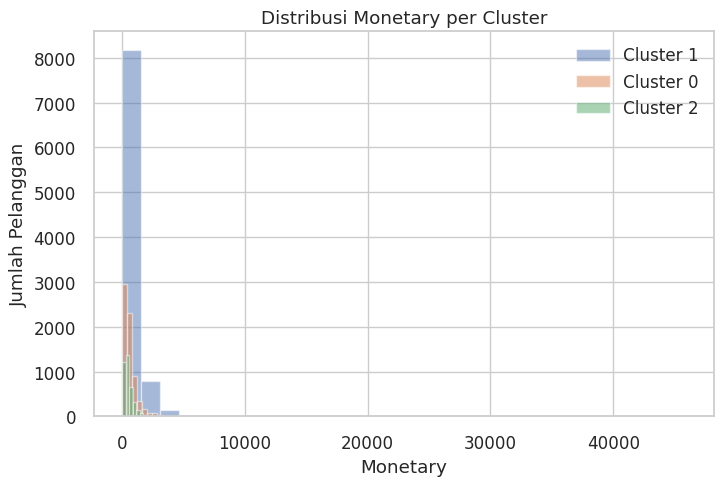

In [ ]:
# Distribusi Monetary per Cluster
plt.figure(figsize=(8,5))
for c in fcm_rfm_inversed['Cluster'].unique():
    plt.hist(fcm_rfm_inversed[fcm_rfm_inversed['Cluster'] == c]['Monetary'],
             alpha=0.5,
             bins=30,
             label=f"Cluster {c}")
plt.title("Distribusi Monetary per Cluster")
plt.xlabel("Monetary")
plt.ylabel("Jumlah Pelanggan")
plt.legend()
plt.show()

In [ ]:
cluster_desc = fcm_rfm_inversed.groupby('Cluster').agg({
    'Recency': ['mean', 'min', 'max', 'std', 'var', 'count'],
    'Frequency': ['mean', 'min', 'max', 'std', 'var', 'count'],
    'Monetary': ['mean', 'min', 'max', 'std', 'var', 'count']
})

# Styling
def style_with_borders(df_rfcm_desc):
    # otomatis dapatkan kolom terakhir tiap fitur
    last_cols = np.cumsum([len(df_rfcm_desc[col].columns) for col in df_rfcm_desc.columns.levels[0]]) - 1

    styles = []
    for col in range(df_rfcm_desc.shape[1]):
        if col in last_cols:
            styles.append({
                'selector': f'th.col{col}, td.col{col}',
                'props': [('border-right', '2px solid #cccccc')]
            })
        styles.append({
            'selector': f'th.col{col}, td.col{col}',
            'props': [('text-align', 'center')]
        })
    return df_rfcm_desc.style.set_table_styles(styles)

# Tampilkan tabel
style_with_borders(cluster_desc)

### Karakteristik Tiap Cluster

1. **Cluster 0: Medium Customer**:
  Cluster ini berisi pelanggan yang masih cukup aktif tetapi tidak terlalu sering berbelanja. Rata-rata mereka melakukan transaksi terakhir sekitar 159 hari yang lalu, artinya tidak baru, namun belum sepenuhnya hilang. Frekuensi pembelian mereka juga berada di level menengah, sekitar 4–5 kali, sehingga mereka bukan pelanggan setia tetapi masih punya potensi. Dari sisi nilai transaksi, pelanggan di cluster ini mengeluarkan rata-rata nilai pembelian sedang. Secara keseluruhan, pelanggan cluster ini merupakan segmen stabil, namun cenderung menurun aktivitasnya jika tidak ditindaklanjuti. Mereka butuh sedikit dorongan agar kembali berbelanja lebih rutin.

2. **Cluster 1: High-Value Customers**:
  Cluster ini adalah segmen dengan pelanggan high-value. Mereka baru saja bertransaksi dengan rata-rata recency hanya 42 hari, yang menunjukkan bahwa mereka sangat aktif. Frekuensi belanja mereka juga paling tinggi, yaitu sekitar 5–6 kali, yang membuat mereka menjadi pelanggan yang paling sering melakukan pembelian. Selain itu, mereka memiliki nilai pembelian paling besar, dengan monetary rata-rata tertinggi dibanding cluster lainnya. Pelanggan di cluster ini adalah VIP customers, yaitu pelanggan setia, aktif, dan menyumbang pendapatan terbesar. Segmen ini harus terus dipertahankan melalui program loyalitas, penawaran eksklusif, atau pelayanan premium.

3. **Cluster 2: Low-Value Inactive Customers**:
  Pelanggan di cluster ini memiliki recency yang sangat tinggi, sekitar 300 hari, artinya mereka sudah hampir satu tahun tidak transaksi. Ini menunjukkan bahwa mereka sudah tidak aktif lagi dan memiliki kemungkinan besar untuk churn. Frekuensi pembelian mereka juga paling rendah di antara semua cluster, dan nilai transaksi rata-rata pun kecil. Secara keseluruhan, cluster ini merepresentasikan pelanggan bernilai rendah dan tidak lagi terlibat dengan brand. Mereka merupakan segmen yang sulit diaktifkan kembali, sehingga strategi yang cocok adalah kampanye reaktivasi khusus atau promosi besar untuk menarik perhatian mereka kembali.

### Rekomendasi Tiap Cluster

1. **Cluster 0: Medium Customer**:
Untuk pelanggan pada Cluster 0, strategi yang paling tepat adalah meningkatkan kembali engagement mereka agar tidak semakin tidak aktif. Karena mereka masih memiliki frekuensi dan nilai pembelian yang cukup baik, pendekatan yang efektif dapat berupa pengiriman reminder berkala, baik melalui email maupun push notification, untuk mengingatkan mereka tentang produk baru atau promo menarik. Memberikan penawaran ringan seperti diskon kecil atau gratis ongkir juga dapat menjadi pemicu penting untuk mendorong transaksi ulang. Program loyalitas seperti pemberian poin tambahan atau informasi “selangkah lagi menuju membership level berikutnya” juga bisa diterapkan untuk menstimulasi perilaku pembelian berulang. Secara keseluruhan, fokus utamanya adalah mempertahankan mereka agar tidak turun menjadi pelanggan tidak aktif dengan cara memberikan stimulasi yang tepat tanpa harus menawarkan insentif yang terlalu besar.

2. **Cluster 1: High-Value Customers**:
Pelanggan pada cluster ini merupakan aset penting bagi bisnis karena nilai transaksi dan tingkat aktivitas mereka yang sangat tinggi. Oleh karena itu, strategi utama yang perlu diterapkan adalah retensi jangka panjang melalui pelayanan yang lebih personal dan eksklusif. Pendekatan seperti program loyalitas premium, prioritas pelayanan, atau akses khusus ke produk terbaru akan membuat mereka merasa dihargai dan meningkatkan keterikatan dengan brand. Selain itu, memberikan reward signifikan seperti cashback khusus VIP, poin ekstra pada transaksi tertentu, atau penawaran bundle premium dapat menjadi cara efektif untuk meningkatkan nilai pembelian mereka lebih jauh. Mengajak mereka berpartisipasi dalam referral program juga dapat memberikan keuntungan ganda: meningkatkan akuisisi pelanggan baru sekaligus memberi benefit bagi pelanggan loyal. Secara keseluruhan, tujuan utamanya adalah mempertahankan mereka dalam jangka panjang dan meningkatkan lifetime value.

3. **Cluster 2: Low-Value Inactive Customers**:
Cluster ini terdiri dari pelanggan yang sudah sangat lama tidak bertransaksi dan memiliki nilai pembelian yang rendah, sehingga strategi yang diperlukan bersifat reaktivasi agresif. Kampanye promosi besar atau penawaran diskon yang lebih signifikan menjadi pendekatan yang paling sesuai untuk menarik kembali perhatian mereka. Mengirimkan pesan bertema win-back seperti “Kami kangen kamu” atau “Ada penawaran spesial untuk pelanggan lama” dapat membantu menciptakan urgensi dan rasa bahwa mereka masih dihargai. Selain itu, memberikan voucher dengan masa berlaku singkat dapat meningkatkan kemungkinan mereka kembali melakukan pembelian. Untuk memahami alasan mereka berhenti, bisnis juga dapat mengirimkan survei singkat disertai insentif kecil. Jika mereka merespons, itu dapat memberikan insight berharga untuk meningkatkan retensi ke depannya. Bagi segmen ini, strategi tidak perlu terlalu mahal atau kompleks; yang terpenting adalah memberikan dorongan kuat yang bisa memancing mereka kembali berinteraksi dengan brand.


## Interpretasi Berdasarkan K Means

In [ ]:
# Membuat kolom cluster dari hasil KMeans PCA
km_rfm_cluster = df_kmeans.copy()
km_rfm_cluster['cluster'] = model_kmeans_pca.labels_

km_rfm_cluster

,Recency,Frequency,Monetary,cluster
0,0.254795,0.015,0.019503,1
1,0.282192,0.095,0.042926,2
2,0.504110,0.015,0.011782,2
3,0.364384,0.000,0.001679,2
4,0.230137,0.000,0.003598,1
...,...,...,...,...
19940,0.901370,0.005,0.007784,0
19941,0.435616,0.000,0.007534,2
19942,0.016438,0.005,0.012821,1
19943,0.290411,0.020,0.021038,2


In [ ]:
km_rfm_inversed = scaler.inverse_transform(df_kmeans)
km_rfm_inversed  = pd.DataFrame(km_rfm_inversed, columns=['Recency','Frequency','Monetary'])
km_rfm_inversed['Cluster'] = model_kmeans_pca.labels_

km_rfm_inversed

,Recency,Frequency,Monetary,Cluster
0,94.0,5.0,939.37,1
1,104.0,21.0,2013.55,2
2,185.0,5.0,585.32,2
3,134.0,2.0,121.97,2
4,85.0,2.0,209.98,1
...,...,...,...,...
19940,330.0,3.0,401.96,0
19941,160.0,2.0,390.47,2
19942,7.0,3.0,632.94,1
19943,107.0,6.0,1009.77,2


In [ ]:
km_rfm_inversed.to_excel("km_rfm_inversed.xlsx", index=False)

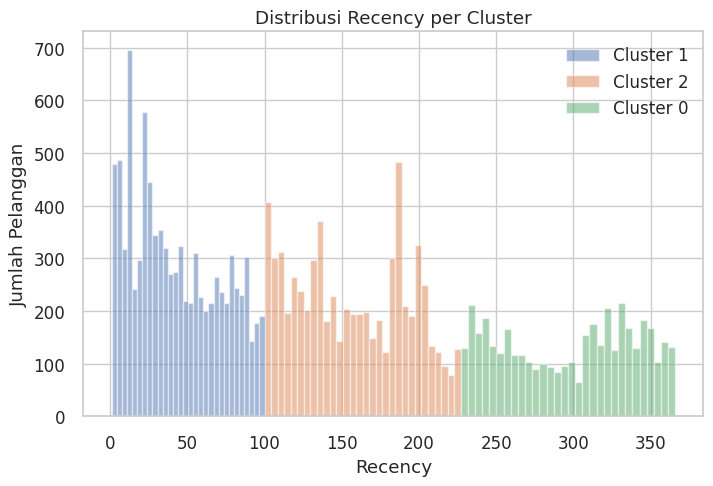

In [ ]:
km_rfm_inversed['Cluster'] = km_rfm_inversed['Cluster'].astype(str)

# Distribusi Recency per Cluster
plt.figure(figsize=(8,5))
for c in km_rfm_inversed['Cluster'].unique():
    plt.hist(km_rfm_inversed[km_rfm_inversed['Cluster'] == c]['Recency'],
             alpha=0.5,
             bins=30,
             label=f"Cluster {c}")
plt.title("Distribusi Recency per Cluster")
plt.xlabel("Recency")
plt.ylabel("Jumlah Pelanggan")
plt.legend()
plt.show()

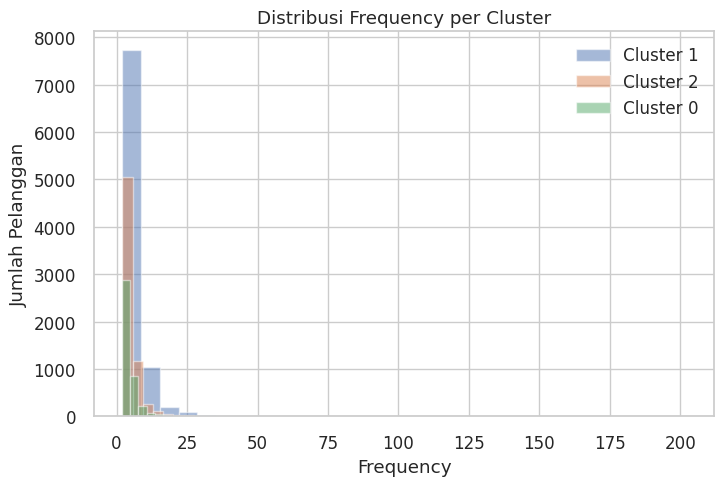

In [ ]:
# Distribusi Frequency per Cluster
plt.figure(figsize=(8,5))
for c in km_rfm_inversed['Cluster'].unique():
    plt.hist(km_rfm_inversed[km_rfm_inversed['Cluster'] == c]['Frequency'],
             alpha=0.5,
             bins=30,
             label=f"Cluster {c}")
plt.title("Distribusi Frequency per Cluster")
plt.xlabel("Frequency")
plt.ylabel("Jumlah Pelanggan")
plt.legend()
plt.show()

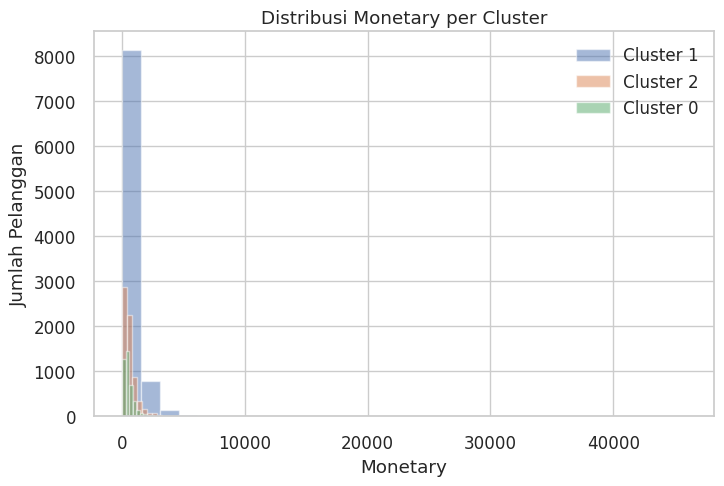

In [ ]:
# Distribusi Monetary per Cluster
plt.figure(figsize=(8,5))
for c in km_rfm_inversed['Cluster'].unique():
    plt.hist(km_rfm_inversed[km_rfm_inversed['Cluster'] == c]['Monetary'],
             alpha=0.5,
             bins=30,
             label=f"Cluster {c}")
plt.title("Distribusi Monetary per Cluster")
plt.xlabel("Monetary")
plt.ylabel("Jumlah Pelanggan")
plt.legend()
plt.show()

In [ ]:
cluster_km_desc = km_rfm_inversed.groupby('Cluster').agg({
    'Recency': ['mean', 'min', 'max', 'std', 'var', 'count'],
    'Frequency': ['mean', 'min', 'max', 'std', 'var', 'count'],
    'Monetary': ['mean', 'min', 'max', 'std', 'var', 'count']
})

# Styling
def style_with_borders(df_km_desc):
    # otomatis dapatkan kolom terakhir tiap fitur
    last_cols = np.cumsum([len(df_km_desc[col].columns) for col in df_km_desc.columns.levels[0]]) - 1

    styles = []
    for col in range(df_km_desc.shape[1]):
        if col in last_cols:
            styles.append({
                'selector': f'th.col{col}, td.col{col}',
                'props': [('border-right', '2px solid #cccccc')]
            })
        styles.append({
            'selector': f'th.col{col}, td.col{col}',
            'props': [('text-align', 'center')]
        })
    return df_km_desc.style.set_table_styles(styles)

# Tampilkan tabel
style_with_borders(cluster_km_desc)

### Karakteristik Tiap Cluster

1. **Cluster 0: Low-Value Inactive Customer**: Pelanggan di cluster ini memiliki recency yang sangat tinggi, sekitar 297 hari, artinya mereka sudah hampir satu tahun tidak transaksi. Ini menunjukkan bahwa mereka sudah tidak aktif lagi dan memiliki kemungkinan besar untuk churn. Frekuensi pembelian mereka juga paling rendah di antara semua cluster, dan nilai transaksi rata-rata pun kecil. Secara keseluruhan, cluster ini merepresentasikan pelanggan bernilai rendah dan tidak lagi terlibat dengan brand. Mereka merupakan segmen yang sulit diaktifkan kembali, sehingga strategi yang cocok adalah kampanye reaktivasi khusus atau promosi besar untuk menarik perhatian mereka kembali.
  

2. **Cluster 1: High-Value Customers**:
  Cluster ini adalah segmen dengan pelanggan high-value. Mereka baru saja bertransaksi dengan rata-rata recency hanya 42 hari, yang menunjukkan bahwa mereka sangat aktif. Frekuensi belanja mereka juga paling tinggi, yang membuat mereka menjadi pelanggan yang paling sering melakukan pembelian. Selain itu, mereka memiliki nilai pembelian paling besar, dengan monetary rata-rata tertinggi dibanding cluster lainnya. Pelanggan di cluster ini adalah VIP customers, yaitu pelanggan setia, aktif, dan menyumbang pendapatan terbesar. Segmen ini harus terus dipertahankan melalui program loyalitas, penawaran eksklusif, atau pelayanan premium.

3. **Cluster 2: Medium Customers**:
Cluster ini berisi pelanggan yang masih cukup aktif tetapi tidak terlalu sering berbelanja. Rata-rata mereka melakukan transaksi terakhir sekitar 156 hari yang lalu, artinya tidak baru, namun belum sepenuhnya hilang. Frekuensi pembelian mereka juga berada di level menengah, sehingga mereka bukan pelanggan setia tetapi masih punya potensi. Dari sisi nilai transaksi, pelanggan di cluster ini mengeluarkan rata-rata nilai pembelian sedang. Secara keseluruhan, pelanggan cluster ini merupakan segmen stabil, namun cenderung menurun aktivitasnya jika tidak ditindaklanjuti. Mereka butuh sedikit dorongan agar kembali berbelanja lebih rutin.
  

### Rekomendasi Tiap Cluster

1. **Cluster 0:  Low-Value Inactive Customer**:
Cluster ini terdiri dari pelanggan yang sudah sangat lama tidak bertransaksi dan memiliki nilai pembelian yang rendah, sehingga strategi yang diperlukan bersifat reaktivasi agresif. Kampanye promosi besar atau penawaran diskon yang lebih signifikan menjadi pendekatan yang paling sesuai untuk menarik kembali perhatian mereka. Mengirimkan pesan bertema win-back seperti “Kami kangen kamu” atau “Ada penawaran spesial untuk pelanggan lama” dapat membantu menciptakan urgensi dan rasa bahwa mereka masih dihargai. Selain itu, memberikan voucher dengan masa berlaku singkat dapat meningkatkan kemungkinan mereka kembali melakukan pembelian. Untuk memahami alasan mereka berhenti, bisnis juga dapat mengirimkan survei singkat disertai insentif kecil. Jika mereka merespons, itu dapat memberikan insight berharga untuk meningkatkan retensi ke depannya. Bagi segmen ini, strategi tidak perlu terlalu mahal atau kompleks, yang terpenting adalah memberikan dorongan kuat yang bisa memancing mereka kembali berinteraksi dengan brand.


2. **Cluster 1: High-Value Customers**:
Pelanggan pada cluster ini merupakan aset penting bagi bisnis karena nilai transaksi dan tingkat aktivitas mereka yang sangat tinggi. Oleh karena itu, strategi utama yang perlu diterapkan adalah retensi jangka panjang melalui pelayanan yang lebih personal dan eksklusif. Pendekatan seperti program loyalitas premium, prioritas pelayanan, atau akses khusus ke produk terbaru akan membuat mereka merasa dihargai dan meningkatkan keterikatan dengan brand. Selain itu, memberikan reward signifikan seperti cashback khusus VIP, poin ekstra pada transaksi tertentu, atau penawaran bundle premium dapat menjadi cara efektif untuk meningkatkan nilai pembelian mereka lebih jauh. Mengajak mereka berpartisipasi dalam referral program juga dapat memberikan keuntungan ganda: meningkatkan akuisisi pelanggan baru sekaligus memberi benefit bagi pelanggan loyal. Secara keseluruhan, tujuan utamanya adalah mempertahankan mereka dalam jangka panjang dan meningkatkan lifetime value.

3. **Cluster 2: Medium Customers**:
Untuk pelanggan pada Cluster 0, strategi yang paling tepat adalah meningkatkan kembali engagement mereka agar tidak semakin tidak aktif. Karena mereka masih memiliki frekuensi dan nilai pembelian yang cukup baik, pendekatan yang efektif dapat berupa pengiriman reminder berkala, baik melalui email maupun push notification, untuk mengingatkan mereka tentang produk baru atau promo menarik. Memberikan penawaran ringan seperti diskon kecil atau gratis ongkir juga dapat menjadi pemicu penting untuk mendorong transaksi ulang. Program loyalitas seperti pemberian poin tambahan atau informasi “selangkah lagi menuju membership level berikutnya” juga bisa diterapkan untuk menstimulasi perilaku pembelian berulang. Secara keseluruhan, fokus utamanya adalah mempertahankan mereka agar tidak turun menjadi pelanggan tidak aktif dengan cara memberikan stimulasi yang tepat tanpa harus menawarkan insentif yang terlalu besar.


# CLustering Berdasarkan RFM Score

In [ ]:
# RFM Score

rfm_score = df[['Recency', 'Frequency', 'Monetary']].copy()

rfm_score['R_Score'] = pd.qcut(rfm_score['Recency'], 5, labels=[5,4,3,2,1])
rfm_score.loc[:, 'R_Score'] = rfm_score['R_Score'].astype(int)

rfm_score['F_Score'] = pd.qcut(rfm_score['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_score.loc[:, 'F_Score'] = rfm_score['F_Score'].astype(int)

# Scoring Monetary
rfm_score['M_Score'] = pd.qcut(rfm_score['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_score.loc[:, 'M_Score'] = rfm_score['M_Score'].astype(int)

rfm_score['RFM_Score'] = rfm_score[['R_Score','F_Score','M_Score']].sum(axis=1)
rfm_score.loc[:, 'RFM_Score'] = rfm_score[['RFM_Score']].astype(int)
rfm_score

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,94,5.0,939.37,3,4,4,11
1,104,21.0,2013.55,3,5,5,13
2,185,5.0,585.32,2,4,3,9
3,134,2.0,121.97,3,1,1,5
4,85,2.0,209.98,3,1,1,5
...,...,...,...,...,...,...,...
19940,330,3.0,401.96,1,3,2,6
19941,160,2.0,390.47,2,2,2,6
19942,7,3.0,632.94,5,3,3,11
19943,107,6.0,1009.77,3,4,4,11


In [ ]:
segments = {
    (1,1): "hibernating",
    (1,2): "hibernating",
    (2,1): "hibernating",
    (2,2): "hibernating",

    (1,3): "at risk",
    (1,4): "at risk",
    (2,3): "at risk",
    (2,4): "at risk",

    (1,5): "can't loose them",
    (2,5): "can't loose them",

    (3,1): "about to sleep",
    (3,2): "about to sleep",

    (3,3): "need attention",
    (3,4): "loyal customers",
    (3,5): "loyal customers",
    (4,4): "loyal customers",
    (4,5): "loyal customers",

    (4,1): "promising",
    (4,2): "potential loyalists",
    (4,3): "potential loyalists",
    (5,2): "potential loyalists",
    (5,3): "potential loyalists",

    (5,1): "new customers",
    (5,4): "champions",
    (5,5): "champions"
}

colors = {
    "hibernating": "#9fa4ad",
    "at risk": "#E29C89",
    "can't loose them": "#B47EDE",
    "about to sleep": "#F9AC98",
    "need attention": "#E05A5A",
    "loyal customers": "#57C4E5",
    "promising": "#F39C12",
    "new customers": "#F8C471",
    "potential loyalists": "#A0D995",
    "champions": "#58D1C9"
}

In [ ]:
rfm_score['Segment'] = rfm_score.apply(lambda x: segments.get((x['R_Score'], x['F_Score'])), axis=1)

seg_count = rfm_score.groupby(['R_Score','F_Score','Segment']).size().reset_index(name='Count')
total = seg_count['Count'].sum()
seg_count['Percent'] = seg_count['Count'] / total * 100

count_dict = {(row.R_Score, row.F_Score): (row.Segment, row.Count, row.Percent)
              for _, row in seg_count.iterrows()}

rfm_score

/tmp/ipython-input-1751626517.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seg_count = rfm_score.groupby(['R_Score','F_Score','Segment']).size().reset_index(name='Count')


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,94,5.0,939.37,3,4,4,11,loyal customers
1,104,21.0,2013.55,3,5,5,13,loyal customers
2,185,5.0,585.32,2,4,3,9,at risk
3,134,2.0,121.97,3,1,1,5,about to sleep
4,85,2.0,209.98,3,1,1,5,about to sleep
...,...,...,...,...,...,...,...,...
19940,330,3.0,401.96,1,3,2,6,at risk
19941,160,2.0,390.47,2,2,2,6,hibernating
19942,7,3.0,632.94,5,3,3,11,potential loyalists
19943,107,6.0,1009.77,3,4,4,11,loyal customers


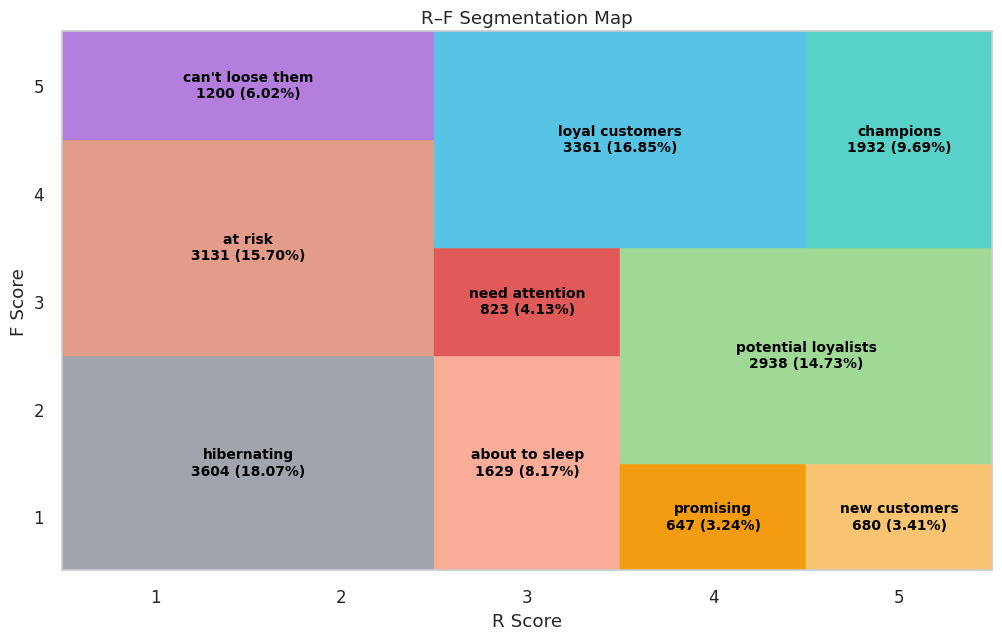

In [ ]:
# Hitung jumlah dan persen per segment
segment_stats = rfm_score.groupby("Segment").size().reset_index(name="count")
total = len(rfm_score)
segment_stats["pct"] = (segment_stats["count"] / total) * 100

seg_count_dict = {
    row["Segment"]: (row["count"], row["pct"])
    for _, row in segment_stats.iterrows()
}

# Hitung posisi kotak per segment
pos_dict = {}
for (r, f), seg in segments.items():
    if seg not in pos_dict:
        pos_dict[seg] = {"xs": [], "ys": []}
    pos_dict[seg]["xs"].append(r-1)
    pos_dict[seg]["ys"].append(f-1)

# Plot Grid
fig, ax = plt.subplots(figsize=(12,7))

for r in range(1,6):
    for f in range(1,6):
        seg_name = segments.get((r, f), "")
        color = colors.get(seg_name, "white")

        ax.add_patch(plt.Rectangle((r-1, f-1), 1, 1, color=color))

# Tampilkan label
for seg, pos in pos_dict.items():
    xs = pos["xs"]
    ys = pos["ys"]

    mid_x = (min(xs) + max(xs) + 1) / 2
    mid_y = (min(ys) + max(ys) + 1) / 2

    cnt, pct = seg_count_dict[seg]
    label = f"{seg}\n{cnt} ({pct:.2f}%)"

    ax.text(mid_x, mid_y, label,
            ha="center", va="center", fontsize=10,
            fontweight="bold", color="black")

# Axis settings
ax.set_xticks(np.arange(0,5)+0.5)
ax.set_yticks(np.arange(0,5)+0.5)
ax.set_xticklabels([1,2,3,4,5])
ax.set_yticklabels([1,2,3,4,5])
ax.set_xlabel("R Score")
ax.set_ylabel("F Score")
ax.set_title("R–F Segmentation Map")
ax.set_xlim(0,5)
ax.set_ylim(0,5)

plt.grid(False)
plt.show()

In [ ]:
pip freeze > requirements.txt